In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [20]:
import pandas as pd
import seaborn as sns

In [4]:
car_data = pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/car data.csv")
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_data.shape

(301, 9)

Since by looking at the data we can see that the selling price is our dependent value and fuel_type, seller_type, transmission are our categorical values

In [10]:
print(car_data["Fuel_Type"].value_counts(),car_data["Seller_Type"].value_counts(),car_data["Transmission"].value_counts(),car_data["Owner"].value_counts(), sep='\n\n')

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

Manual       261
Automatic     40
Name: Transmission, dtype: int64

0    290
1     10
3      1
Name: Owner, dtype: int64


now check for missing values if any

In [11]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
car_data.describe(include="all")

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [14]:
col = car_data.columns.to_list()
col.remove('Car_Name')

car_dup = car_data[col]
car_dup.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


we can see that the year is of no used except for deriving a new column of number of years since manufacturing

In [16]:
current_year = 2021
car_dup["Num_Years"] = current_year-car_dup["Year"] 
car_dup.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Num_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [17]:
car_dup.drop('Year', axis=1, inplace=True)
car_dup.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Num_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


## One Hot Encoding to convert categorical data to numeric data

In [18]:
final_data = car_dup.copy()
final_data = pd.get_dummies(final_data, drop_first=True)
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Num_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [19]:
final_data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Num_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Num_Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


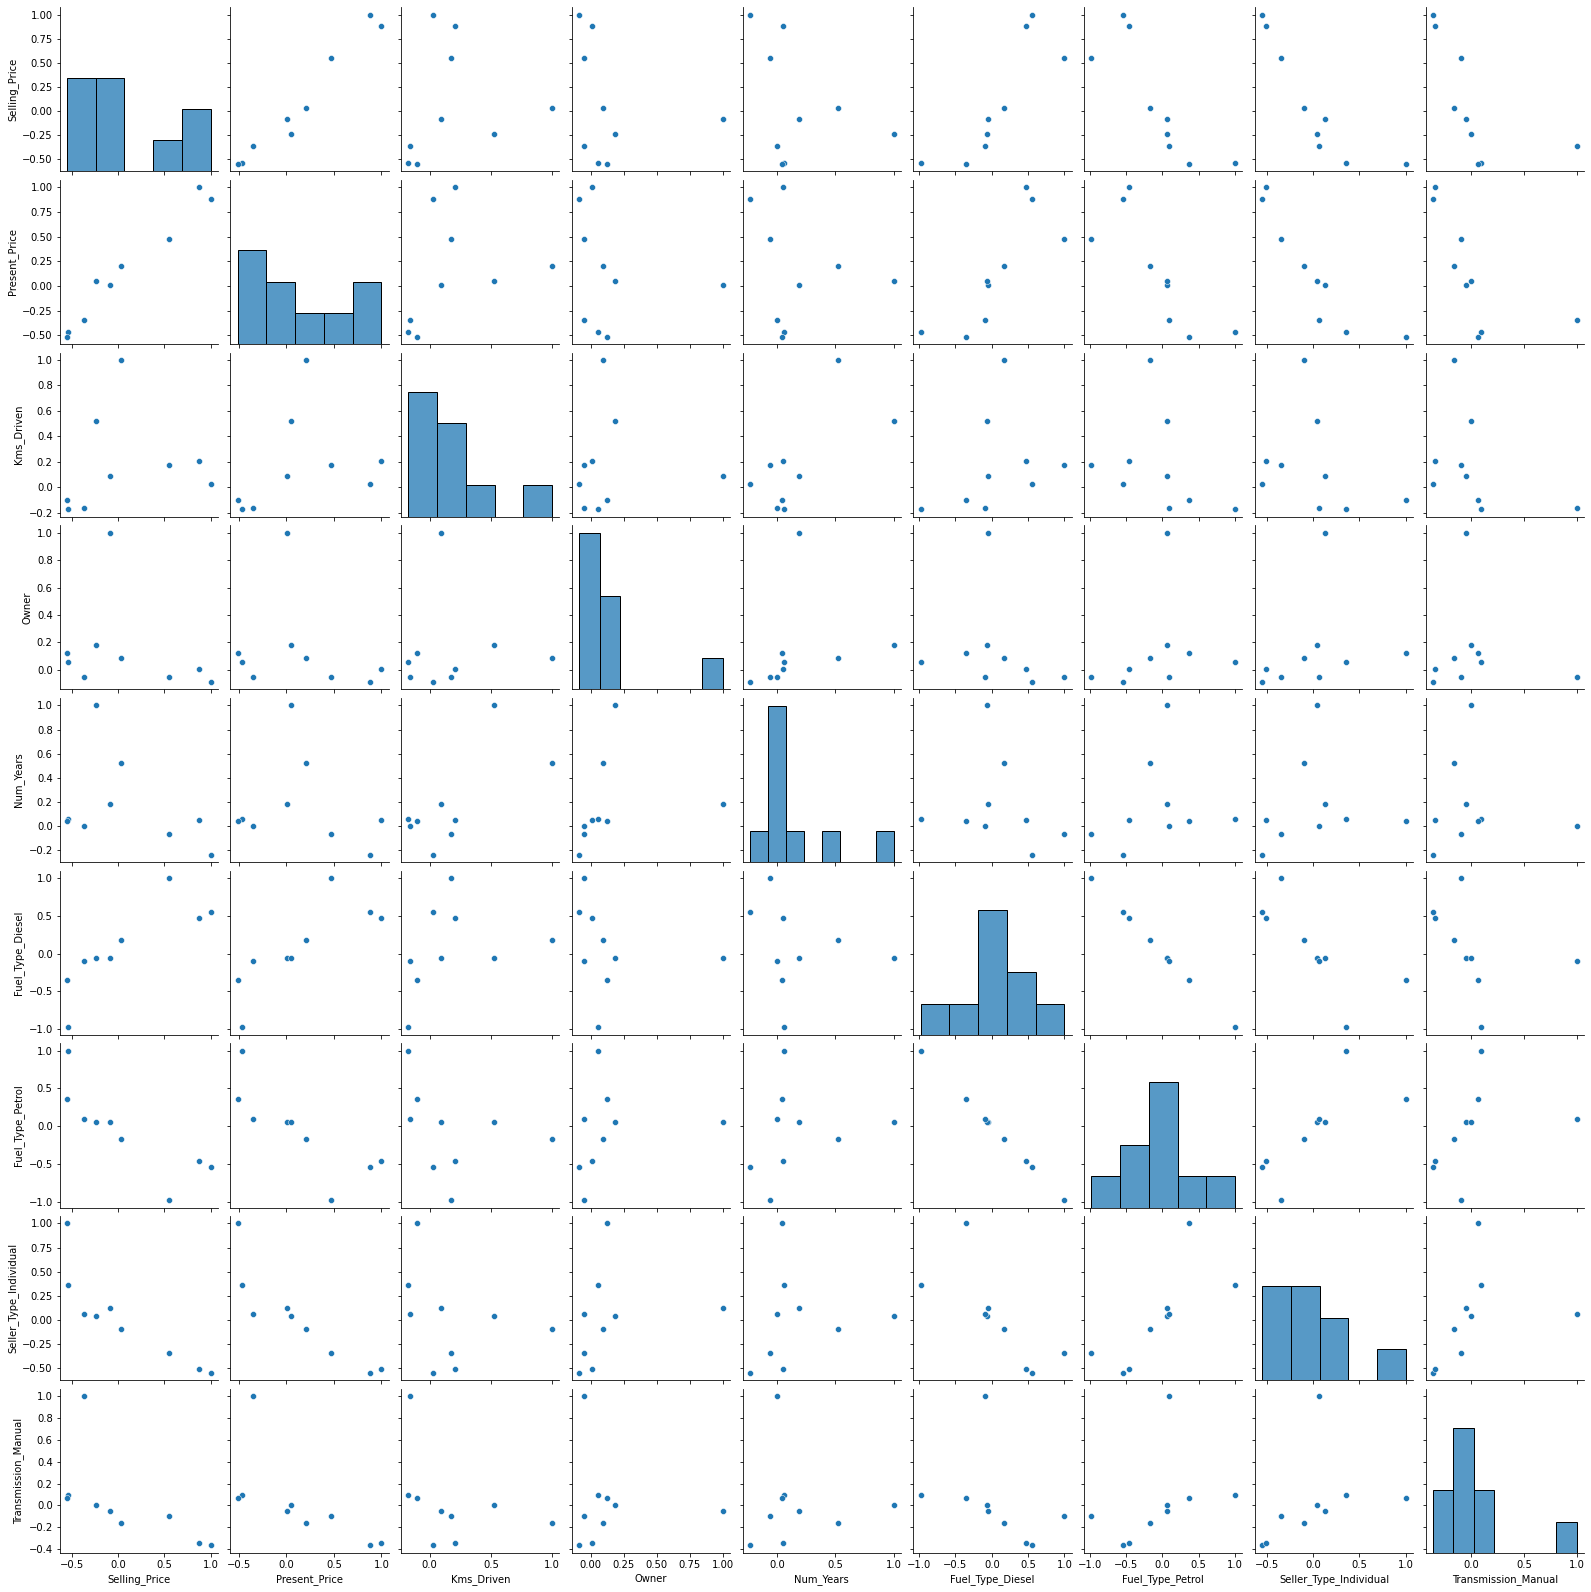

In [21]:
sns.pairplot(final_data.corr())

the pairplot visualizes the correlation table in a form and shows how strongly two variables are related, we'll use heatmap next to make it more visualizing.

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

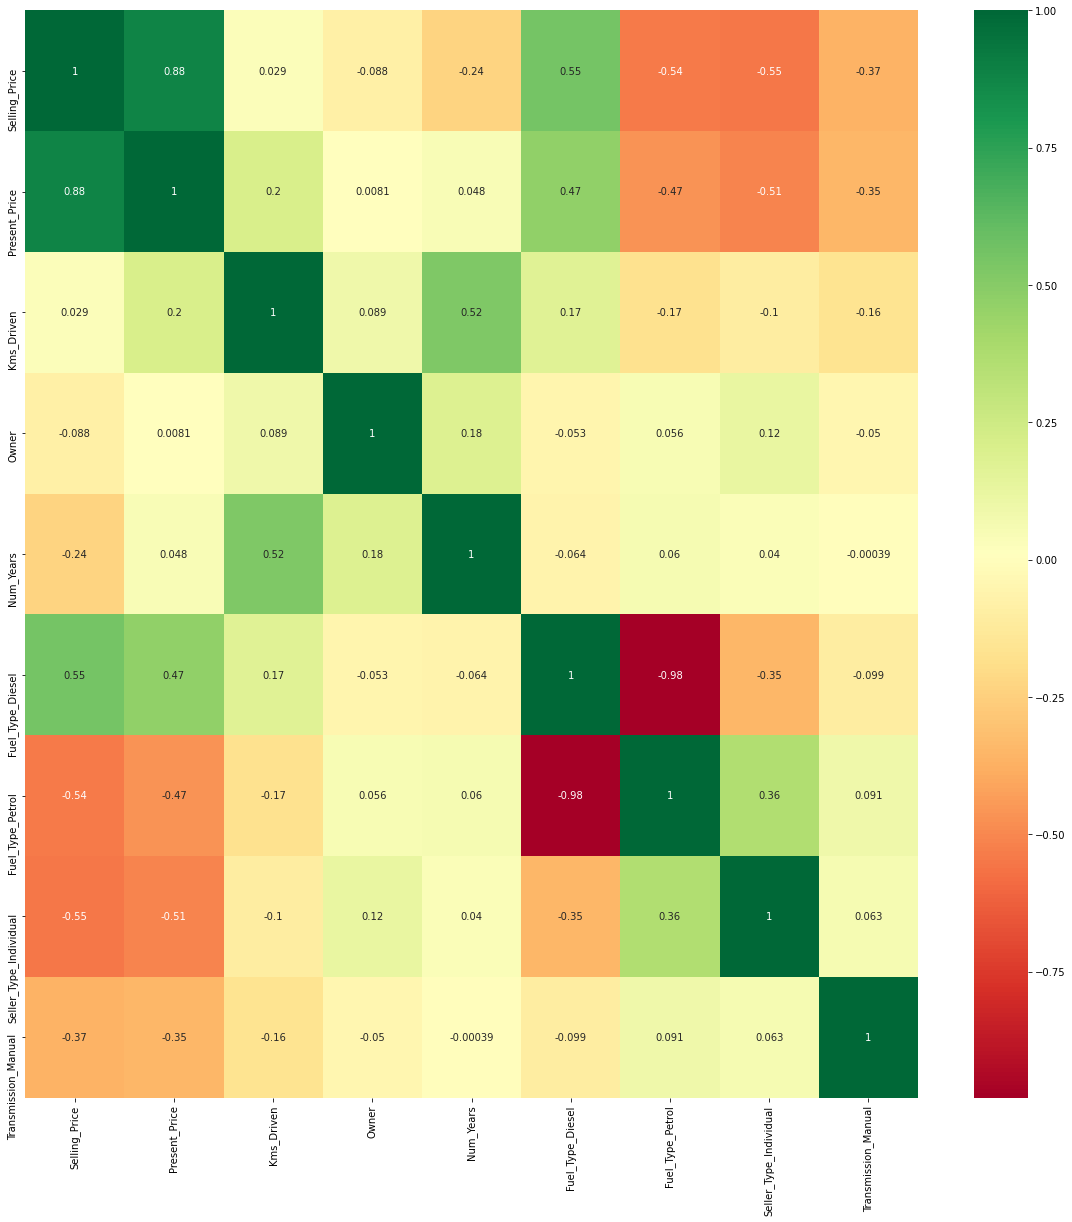

In [26]:
corrmat = final_data.corr()
top_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heatmap
graph = sns.heatmap(final_data[top_features].corr(),annot = True, cmap='RdYlGn')

In [28]:
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Num_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


let's separate the dependent and independent variable now

In [31]:
X = final_data.iloc[:,1:]
y = final_data.iloc[:,0]

In [32]:
print(X.head(), y.head(), sep='\n\n')

   Present_Price  Kms_Driven  Owner  Num_Years  Fuel_Type_Diesel  \
0           5.59       27000      0          7                 0   
1           9.54       43000      0          8                 1   
2           9.85        6900      0          4                 0   
3           4.15        5200      0         10                 0   
4           6.87       42450      0          7                 1   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                 1                       0                    1  
1                 0                       0                    1  
2                 1                       0                    1  
3                 1                       0                    1  
4                 0                       0                    1  

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64


In [33]:
## Feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [34]:
print(model.feature_importances_)

[0.38369085 0.04040734 0.00061854 0.07493921 0.22433183 0.00962917
 0.12761853 0.13876454]


we can see that the first feature and fifth feature (present price and fuel_type_diesel) has the most importance

let's see this by visualization

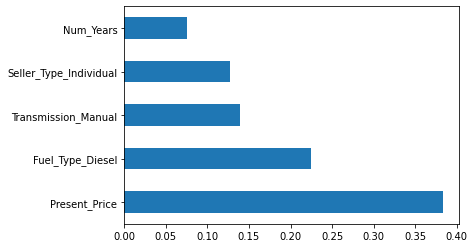

In [35]:
feat_importance = pd.Series(model.feature_importances_, index = X.columns)
feat_importance.nlargest(5).plot(kind='barh')
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [37]:
print(X_train.shape)
print(X_test.shape)

(240, 8)
(61, 8)


240 out of 301 of our data is for training, and 61 records are for testing

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

let's work with the hyperparamters and some other parameters of RandomForestRegressor

In [40]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start  = 100, stop = 1200, num = 12)]
n_estimators

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

the array shows the number of different decision trees that will be used in RandomForestRegressor

In [41]:
#Randomized Serach CV

max_features = ['auto','sqrt']
#max number of levels in a tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
#min number of samples required to split a node
min_samples_split = [2,5,10,15,100]
#Min number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [42]:
from sklearn.model_selection import RandomizedSearchCV

RandomizedSearchCV helps us to find the best parameters for our data. It's also faster then gridsearchCV

In [44]:
random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf
}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [45]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator= rf, param_distributions= random_grid, scoring='neg_mean_squared_error',n_iter=10, cv = 5, verbose=2, random_state=42, n_jobs=1)
#verbose displays the results

this RandomizedSearchCV takes input as the parameters that we have specified and will automatically select the best parameters for us.

In [47]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [48]:
y_pred = rf_random.predict(X_test)
y_pred

array([ 4.59406,  5.8554 ,  3.18775,  5.49995,  8.97597,  7.13193,
       12.10124,  6.97435,  0.51722,  9.76741,  0.54578,  0.24934,
        5.40885,  5.91977,  6.53433,  0.4454 ,  1.10474,  4.90735,
        5.38894,  3.18869,  4.57667,  9.41801, 13.87485,  1.13439,
        4.3854 ,  0.52296,  0.91334,  7.81065,  5.13804,  4.9978 ,
        3.27931,  3.45147,  5.99615,  6.48985,  9.22069, 19.97514,
        0.45317,  5.51105,  0.56368,  0.30401,  9.05764,  0.34228,
        1.20891,  0.32639,  2.17611,  0.6007 ,  0.93728,  8.4485 ,
        6.44362, 16.7608 ,  4.94085,  1.25014,  0.57909,  4.282  ,
        0.66063,  0.70654, 10.32817,  0.59768,  8.78157,  3.86515,
        8.73445])

to compare the results, we will use displot

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

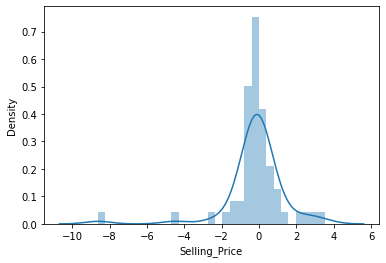

In [49]:
sns.distplot(y_test - y_pred)

since the graph shows the normal distribution, it means the model is giving great results.

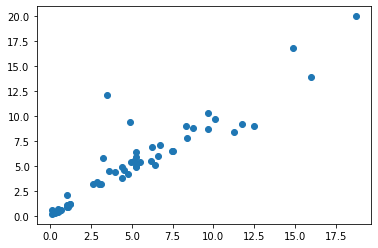

In [50]:
plt.scatter(y_test, y_pred)

linear line shows that our results are good